In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df =pd.read_csv("Iris.csv")
#data preprocessing
df.drop('Id',axis=1,inplace=True)
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y = df['Species']

In [3]:
#splitting the dataset for training and test
#here 0.3 splits the dataset into 70:30
train, test  = train_test_split(df,test_size=0.3)
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train["Species"]# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test["Species"]   #output value of test data

In [4]:
#naive bayes classifier
#fitting model on train_data
gnb = GaussianNB()
gnb.fit(train_X,train_y)
prediction1 = gnb.predict(test_X)


In [5]:
#calculating accuracy of naiye bayes model using cross validation

scores = cross_val_score(estimator = gnb, X= test_X, y= test_y, cv=10, scoring="accuracy")
print("10 fold cross validation scores:",scores)
meanScore = scores.mean()
print("Accuracy of naiye bayes model on test data using cross validation:",meanScore * 100)

10 fold cross validation scores: [0.8  1.   1.   1.   1.   1.   1.   1.   0.75 0.75]
Accuracy of naiye bayes model on test data using cross validation: 93.0


In [6]:
#K nearest neighbor model
scores = []
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(train_X, train_y)
    prediction = model_knn.predict(test_X)
    scores.append(metrics.accuracy_score(prediction,test_y))

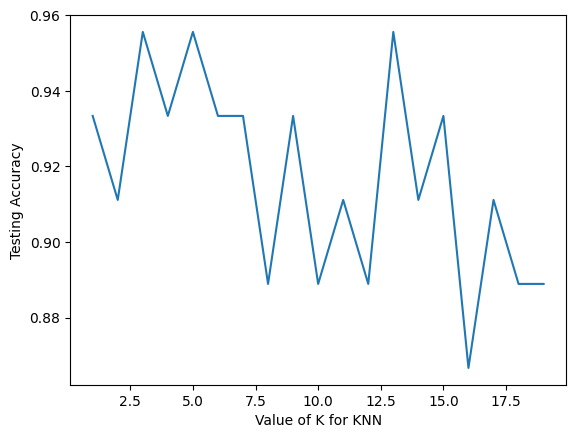

In [7]:
#using elbow method for calculating optimal value of K 
k_range =range(1,20)
k_values= pd.DataFrame({"Value of K": k_range,"Accuracy":scores})
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [8]:
#prediction with optimal value of K
opt_k = scores.index(max(scores))
model_knn = KNeighborsClassifier(n_neighbors=opt_k+1)
model_knn.fit(train_X, train_y)
prediction2 = model_knn.predict(test_X)

In [9]:
print(k_values)
print("Optimal value of k is : ",opt_k+1)
print("Accuracy of KNN with optimal value of k :")
accu = metrics.accuracy_score(prediction2,test_y)*100
print(accu)

    Value of K  Accuracy
0            1  0.933333
1            2  0.911111
2            3  0.955556
3            4  0.933333
4            5  0.955556
5            6  0.933333
6            7  0.933333
7            8  0.888889
8            9  0.933333
9           10  0.888889
10          11  0.911111
11          12  0.888889
12          13  0.955556
13          14  0.911111
14          15  0.933333
15          16  0.866667
16          17  0.911111
17          18  0.888889
18          19  0.888889
Optimal value of k is :  3
Accuracy of KNN with optimal value of k :
95.55555555555556


In [10]:
print("prediction on test data using naive bayes model :",prediction1)
print("prediction on test data using knn model:",prediction2)

prediction on test data using naive bayes model : [0 1 1 1 1 1 2 2 0 0 0 2 1 0 0 0 2 1 2 1 1 0 0 1 2 0 0 0 0 0 1 1 1 1 2 0 2
 1 1 1 1 2 2 2 1]
prediction on test data using knn model: [0 1 1 1 1 1 2 2 0 0 0 2 1 0 0 0 2 1 2 1 1 0 0 1 2 0 0 0 0 0 1 1 1 2 2 0 2
 1 2 1 2 2 2 2 1]
